In [1]:
# pip install tensorflow

# Deep learning classifcation on Fashion MNIST 

## Overview 
### Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
| Label       | Description |
| ----------- | ----------- |
| 0           | T-shirt/Top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle Boot  |


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

- X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

- y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

- X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

- y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

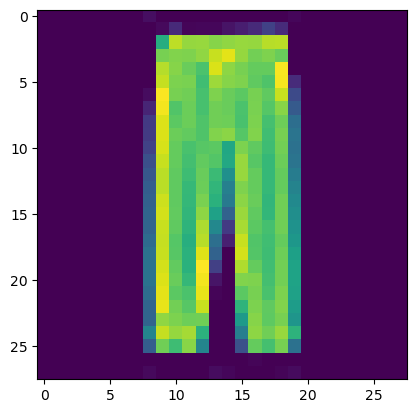

In [3]:
# lets see what the images look like
# The following shows a pants
import matplotlib.pyplot as plt
image = X_train[21, :].reshape((28, 28))

plt.imshow(image)
plt.show()  

# 1 Layer Dense NN

In [4]:
# Baseline simple neural network
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Dense(128, input_shape=(28,28), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 128)           3712      
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                35850     
                                                                 
Total params: 39,562
Trainable params: 39,562
Non-trainable params: 0
_________________________________________________________________


### loss='sparse_categorical_crossentropy" is used for label encoded data

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2)
results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)
print("test loss,", results[0], "test acc:", results[1])

Epoch 1/5
1875/1875 - 6s - loss: 2.7449 - accuracy: 0.7944 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.5458 - accuracy: 0.8372 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 6s - loss: 0.4693 - accuracy: 0.8468 - 6s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.4517 - accuracy: 0.8491 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 7s - loss: 0.4337 - accuracy: 0.8518 - 7s/epoch - 4ms/step
313/313 - 1s - loss: 0.5671 - accuracy: 0.8240 - 1s/epoch - 4ms/step
test loss, 0.5670505166053772 test acc: 0.8240000009536743


In [6]:
# Train your model and save its history
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
  



Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4544 - accuracy: 0.8493 - val_loss: 0.5651 - val_accuracy: 0.8375
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4278 - accuracy: 0.8551 - val_loss: 0.6071 - val_accuracy: 0.8283
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4167 - accuracy: 0.8571 - val_loss: 0.6092 - val_accuracy: 0.8348
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4102 - accuracy: 0.8585 - val_loss: 0.6761 - val_accuracy: 0.8139
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3994 - accuracy: 0.8632 - val_loss: 0.6457 - val_accuracy: 0.8296
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3969 - accuracy: 0.8612 - val_loss: 0.6624 - val_accuracy: 0.8378
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3894 - accuracy: 0.8651 - val_loss: 0.7017 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# 2 layer Dense Neural network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 28, 128)           3712      
                                                                 
 dense_3 (Dense)             (None, 28, 64)            8256      
                                                                 
 dense_4 (Dense)             (None, 28, 32)            2080      
                                                                 
 flatten_1 (Flatten)         (None, 896)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                8970      
                                                                 
Total params: 23,018
Trainable params: 23,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1875/1875 [============================

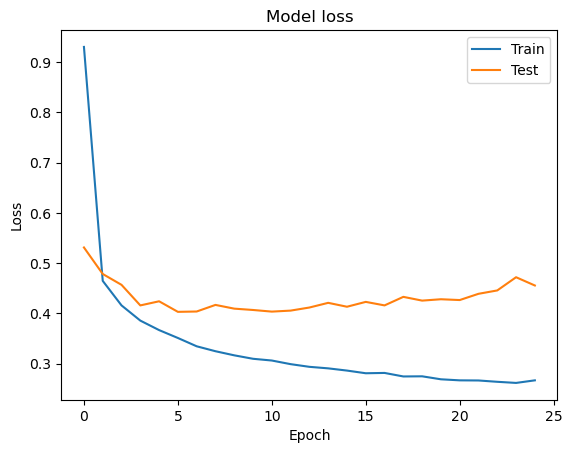

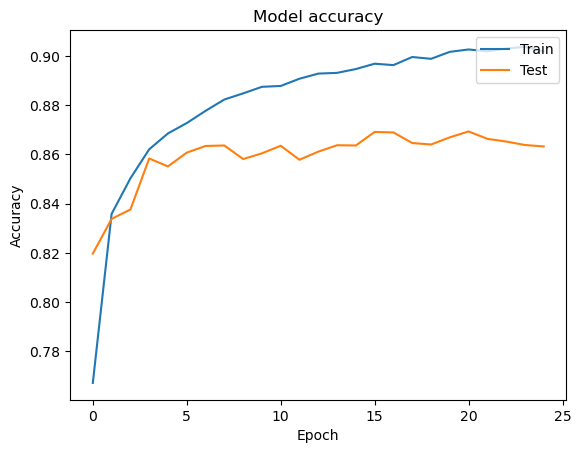

In [7]:
# Baseline simple neural network
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )

model = Sequential()
model.add(Dense(128, input_shape=(28,28), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])



Convolutional Neural Network (CNN)

In [12]:
# Import the Conv2D and Flatten layers and instantiate model
from tensorflow.keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'sigmoid'))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


Epoch 1/25
 100/1875 [>.............................] - ETA: 30s - loss: 6.5191 - accuracy: 0.6556

KeyboardInterrupt: 

# Conv 2d by machine learning mastery

c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 90.875
> 91.450
> 91.250
> 90.858
> 91.067


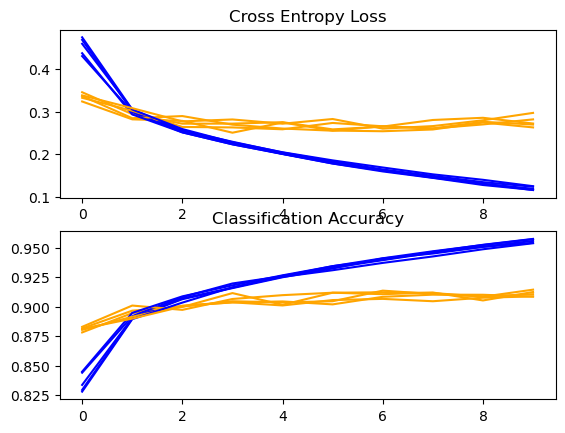

Accuracy: mean=91.100 std=0.226, n=5


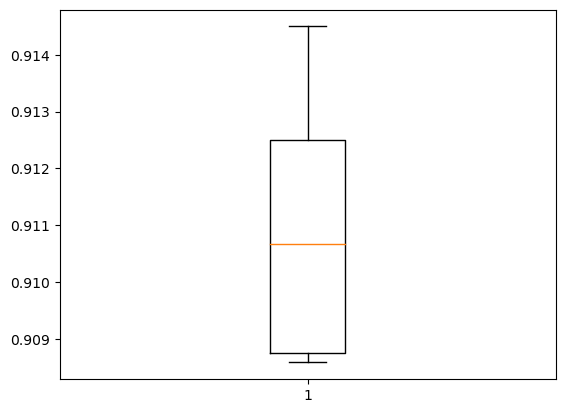

In [13]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

## Batch size training with and without

## With Hyperparameter tuning


## Autoencoding and denoisning

# 

## Final Results + conclusion ( need more data etc?)

# Trying out RNN


# Deeper RNNs

# Batch size training with and without

# With Hyperparameter tuning


# Final Results + conclusion ( need more data etc?)